<a href="https://colab.research.google.com/github/HappyCocker1111/IrisClassification/blob/main/%E3%83%87%E3%83%BC%E3%82%BF%E3%81%AE%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 学習用データの読み込み
train_data = pd.read_csv('train.tsv', sep='\t')

train_data.head()

,id,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,0,5.3,3.7,1.5,0.2,Iris-setosa
1,1,6.8,2.8,4.8,1.4,Iris-versicolor
2,3,6.1,3.0,4.9,1.8,Iris-virginica
3,4,6.4,3.2,5.3,2.3,Iris-virginica
4,5,6.3,3.3,4.7,1.6,Iris-versicolor


In [ ]:
train_data.columns

Index(['id', 'sepal length in cm', 'sepal width in cm', 'petal length in cm',
       'petal width in cm', 'class'],
      dtype='object')

In [ ]:
train_data[list(train_data.columns)]

,id,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class,class_encoded
0,0,5.3,3.7,1.5,0.2,Iris-setosa,0
1,1,6.8,2.8,4.8,1.4,Iris-versicolor,1
2,3,6.1,3.0,4.9,1.8,Iris-virginica,2
3,4,6.4,3.2,5.3,2.3,Iris-virginica,2
4,5,6.3,3.3,4.7,1.6,Iris-versicolor,1
...,...,...,...,...,...,...,...
70,142,6.4,3.2,4.5,1.5,Iris-versicolor,1
71,143,5.4,3.9,1.7,0.4,Iris-setosa,0
72,145,5.6,3.0,4.1,1.3,Iris-versicolor,1
73,148,5.2,2.7,3.9,1.4,Iris-versicolor,1


               id  sepal length in cm  sepal width in cm  petal length in cm  \
count   75.000000           75.000000          75.000000           75.000000   
mean    72.773333            5.922667           3.097333            3.844000   
std     46.039223            0.877277           0.443565            1.852116   
min      0.000000            4.400000           2.000000            1.000000   
25%     33.000000            5.100000           2.800000            1.550000   
50%     72.000000            5.900000           3.000000            4.400000   
75%    114.000000            6.450000           3.350000            5.250000   
max    149.000000            7.900000           4.200000            6.900000   

       petal width in cm  
count          75.000000  
mean            1.220000  
std             0.787572  
min             0.100000  
25%             0.200000  
50%             1.400000  
75%             1.800000  
max             2.500000  
class
Iris-virginica     29
Iris-set

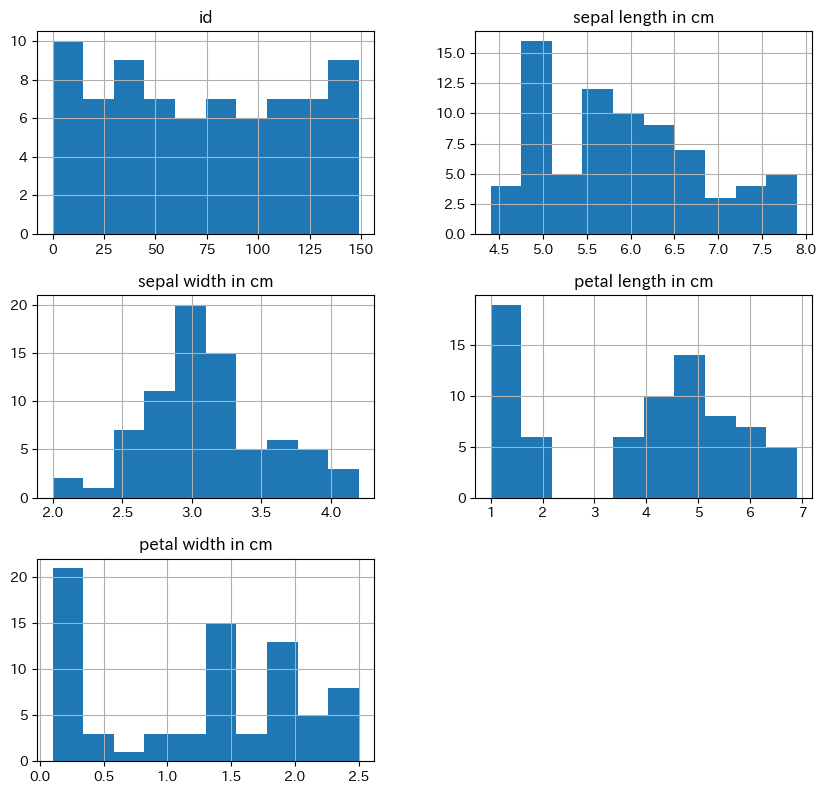

,id,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
id,1.000000,-0.153779,0.018168,-0.146934,-0.117532,-0.156338
sepal length in cm,-0.153779,1.000000,-0.150560,0.885132,0.815522,0.791547
sepal width in cm,0.018168,-0.150560,1.000000,-0.453029,-0.400215,-0.474890
petal length in cm,-0.146934,0.885132,-0.453029,1.000000,0.955735,0.951869
petal width in cm,-0.117532,0.815522,-0.400215,0.955735,1.000000,0.952360
class,-0.156338,0.791547,-0.474890,0.951869,0.952360,1.000000


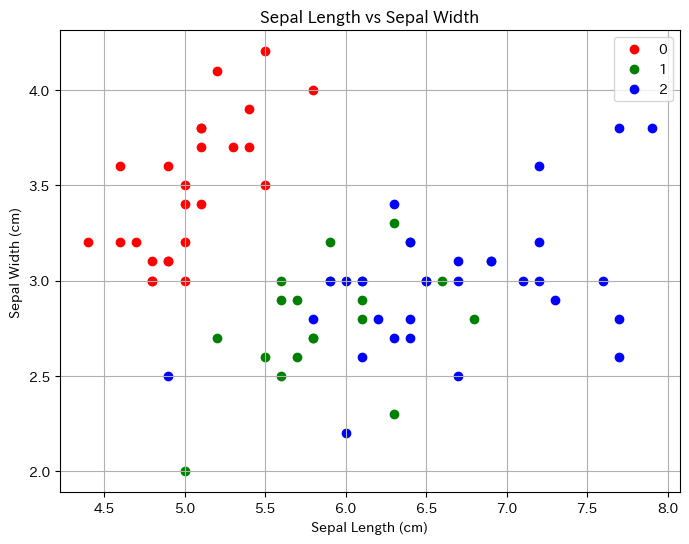

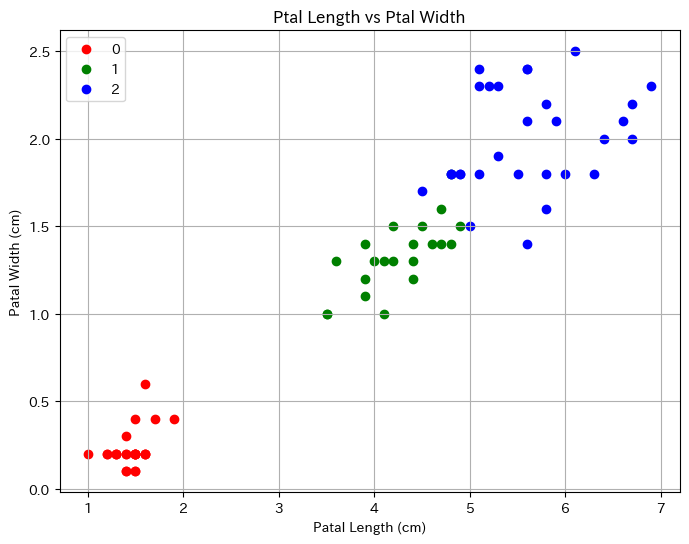

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# 学習用データの読み込み
train_data = pd.read_csv('train.tsv', sep='\t')

# データの統計量
print(train_data.describe())

# 各品種の個数
print(train_data['class'].value_counts())

# 各属性の分布
train_data.hist(figsize=(10, 10))
plt.subplots_adjust(bottom=0.15)
plt.show()

# ラベルエンコーディング
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_data['class'] = le.fit_transform(train_data['class'])

# 各属性間の相関関係
correlation = train_data[list(train_data.columns)].corr()
display(correlation)


# 散布図を作成
plt.figure(figsize=(8, 6))  # グラフのサイズを調整
colors = ['red', 'green', 'blue']  # 判例ごとに異なる色を定義
for i, class_name in enumerate(train_data['class'].unique()):
    plt.scatter(train_data[train_data['class'] == class_name]['sepal length in cm'],
                train_data[train_data['class'] == class_name]['sepal width in cm'],
                c=colors[i], label=class_name)

# 凡例を表示
plt.legend()

# 軸ラベルとタイトルを設定
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')

# グラフを表示
plt.grid(True)  # グリッド線を表示
plt.show()

# 花弁の長さと幅の散布図
# 散布図を作成
plt.figure(figsize=(8, 6))  # グラフのサイズを調整
colors = ['red', 'green', 'blue']  # 判例ごとに異なる色を定義
for i, class_name in enumerate(train_data['class'].unique()):
    plt.scatter(train_data[train_data['class'] == class_name]['petal length in cm'],
                train_data[train_data['class'] == class_name]['petal width in cm'],
                c=colors[i], label=class_name)

# 凡例を表示
plt.legend()

# 軸ラベルとタイトルを設定
plt.xlabel('Patal Length (cm)')
plt.ylabel('Patal Width (cm)')
plt.title('Ptal Length vs Ptal Width')

# グラフを表示
plt.grid(True)  # グリッド線を表示
plt.show()


# 試作

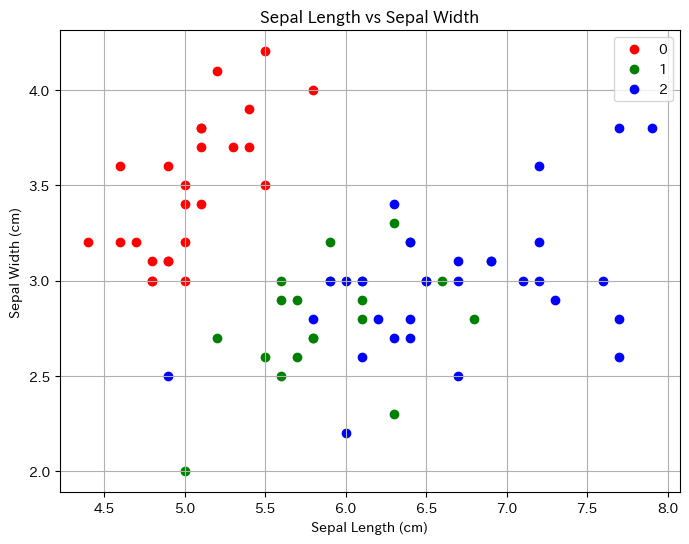

In [49]:
# 散布図を作成
plt.figure(figsize=(8, 6))  # グラフのサイズを調整
colors = ['red', 'green', 'blue']  # 判例ごとに異なる色を定義
for i, class_name in enumerate(train_data['class'].unique()):
    plt.scatter(train_data[train_data['class'] == class_name]['sepal length in cm'],
                train_data[train_data['class'] == class_name]['sepal width in cm'],
                c=colors[i], label=class_name)

# 凡例を表示
plt.legend()

# 軸ラベルとタイトルを設定
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')

# グラフを表示
plt.grid(True)  # グリッド線を表示
plt.show()

In [30]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 36.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=895090a7060a0610f2acf1af9a3c1055b335a3183d375d6275a62a2e280a33d7
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [31]:
import japanize_matplotlib

ValueError: 'c' argument has 3 elements, which is inconsistent with 'x' and 'y' with size 75.

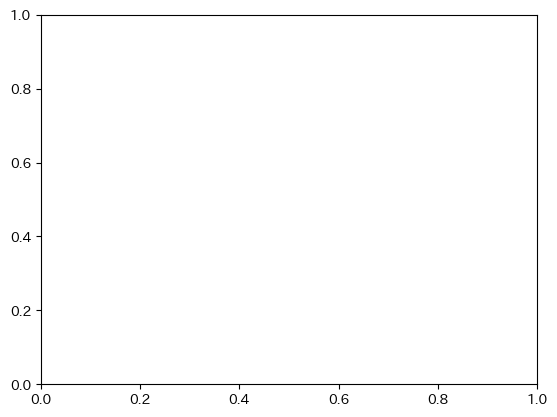

In [48]:
train_data.plot(kind='scatter', x='sepal length in cm', y='sepal width in cm')

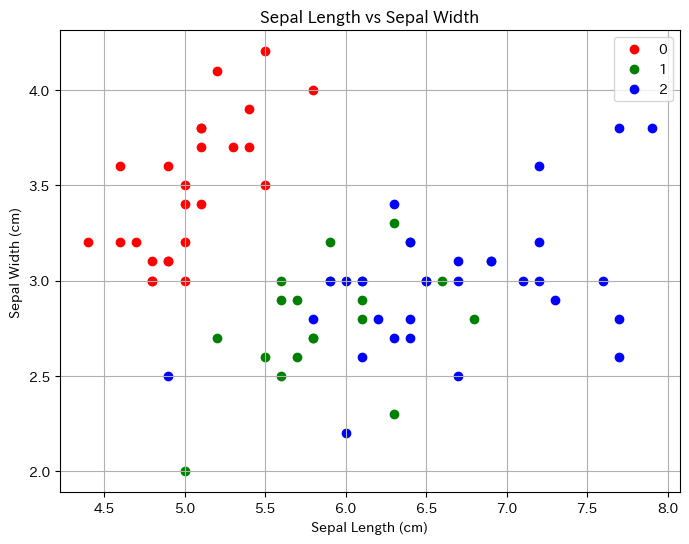

In [43]:
# 散布図を作成
plt.figure(figsize=(8, 6))  # グラフのサイズを調整
colors = ['red', 'green', 'blue']  # 判例ごとに異なる色を定義
for i, class_name in enumerate(train_data['class'].unique()):
    plt.scatter(train_data[train_data['class'] == class_name]['sepal length in cm'],
                train_data[train_data['class'] == class_name]['sepal width in cm'],
                c=colors[i], label=class_name)

# 凡例を表示
plt.legend()

# 軸ラベルとタイトルを設定
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')

# グラフを表示
plt.grid(True)  # グリッド線を表示
plt.show()

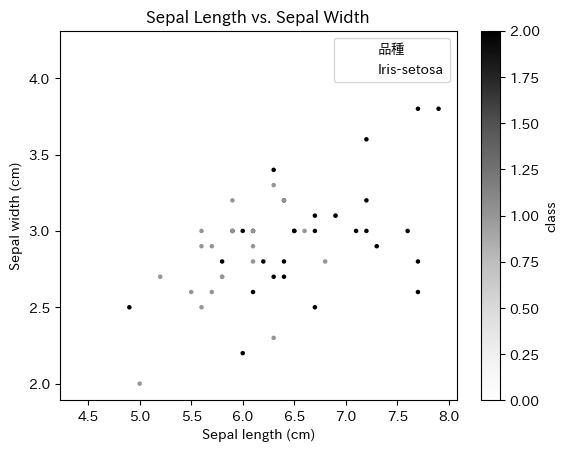

In [38]:
# 散布図の作成
train_data.plot.scatter(x='sepal length in cm', y='sepal width in cm', c='class', s=5)
# 凡例の追加
plt.legend(title='品種', labels=le.classes_)

# 軸ラベルの設定
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')

# タイトルの設定
plt.title('Sepal Length vs. Sepal Width')

# グラフの表示
plt.show()


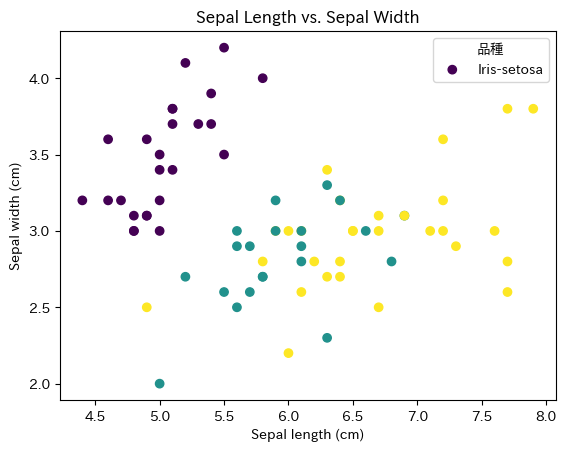

In [34]:
# がく片の長さと幅の散布図
#plt.scatter(train_data['sepal length (cm)'], train_data['sepal width (cm)'], c=train_data['class'])
plt.scatter(train_data['sepal length in cm'], train_data['sepal width in cm'], c=train_data['class'])
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Sepal Length vs. Sepal Width')
# 散布図に凡例を追加
plt.legend(title='品種', labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.show()

In [39]:
train_data

,id,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,0,5.3,3.7,1.5,0.2,0
1,1,6.8,2.8,4.8,1.4,1
2,3,6.1,3.0,4.9,1.8,2
3,4,6.4,3.2,5.3,2.3,2
4,5,6.3,3.3,4.7,1.6,1
...,...,...,...,...,...,...
70,142,6.4,3.2,4.5,1.5,1
71,143,5.4,3.9,1.7,0.4,0
72,145,5.6,3.0,4.1,1.3,1
73,148,5.2,2.7,3.9,1.4,1


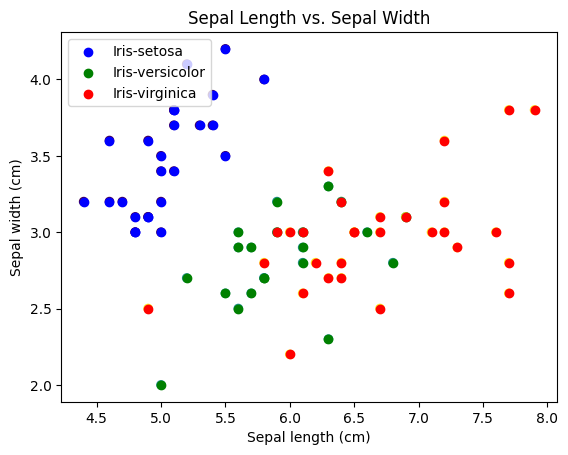

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# 学習用データの読み込み
train_data = pd.read_csv('train.tsv', sep='\t')

# ラベルエンコーディング
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_data['class'] = le.fit_transform(train_data['class'])

# がく片の長さと幅の散布図
plt.scatter(train_data['sepal length in cm'], train_data['sepal width in cm'], c=train_data['class'])
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Sepal Length vs. Sepal Width')

# 凡例を追加
plt.legend(title='品種', labels=le.classes_)

# データの種類ごとに色分け
plt.scatter(train_data[train_data['class'] == 0]['sepal length in cm'],
            train_data[train_data['class'] == 0]['sepal width in cm'],
            c='blue', label='Iris-setosa')
plt.scatter(train_data[train_data['class'] == 1]['sepal length in cm'],
            train_data[train_data['class'] == 1]['sepal width in cm'],
            c='green', label='Iris-versicolor')
plt.scatter(train_data[train_data['class'] == 2]['sepal length in cm'],
            train_data[train_data['class'] == 2]['sepal width in cm'],
            c='red', label='Iris-virginica')

# 凡例の位置を調整
plt.legend(loc='upper left')

plt.show()


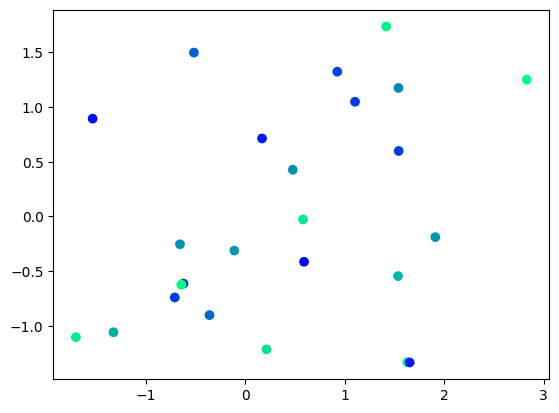

In [26]:
import matplotlib.pyplot as plt
import numpy as np

#乱数を25個ずつ生成
x = np.random.randn(25)
y = np.random.randn(25)

colors = np.random.rand(25)

plt.scatter(x, y, c=colors, cmap="winter")
plt.show()

<Axes: >

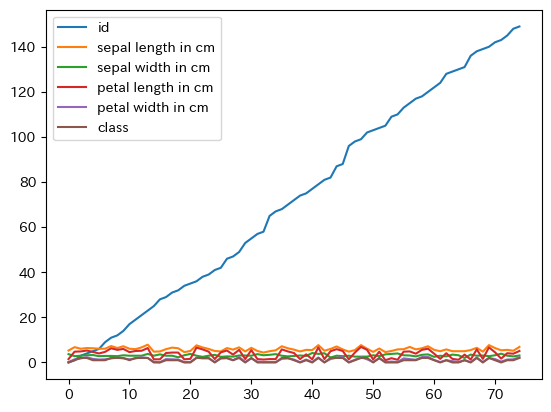

In [36]:
train_data.plot()

# 考察

1. 各品種の特徴:

* Iris-setosaは、他の2品種に比べてがく片と花弁が全体的に小さく、特にがく片の幅が小さいことが特徴です。

* Iris-virginicaは、がく片と花弁の長さが比較的大きく、特に花弁の幅が大きいことが特徴です。

* Iris-versicolorは、がく片と花弁の長さ・幅が中程度で、3品種の中で最もバランスが取れていることが特徴です。


2. 属性間の関係:

* がく片の長さと幅は、ある程度正の相関関係があります。

* 花弁の長さと幅も、ある程度正の相関関係があります。

* がく片の長さと花弁の長さは、弱い正の相関関係があります。

* がく片の長さと花弁の幅は、弱い負の相関関係があります。

* がく片の幅と花弁の幅は、弱い負の相関関係があります。


3. 品種の判別:

* がく片と花弁の長さ・幅を考慮することで、ある程度各品種を判別することができます。

* より精度高い判別を行うためには、機械学習などの手法を用いる必要があります。